An example of how toroidal coordinates is more reliable than circular coordinates when one seeks to parametrized many circularities with a single circle-valued map

In [1]:
import numpy as np

from dreimac.toroidalcoords import ToroidalCoords
from dreimac.circularcoords import CircularCoords
from dreimac.utils import GeometryExamples, PlotUtils, CircleMapUtils

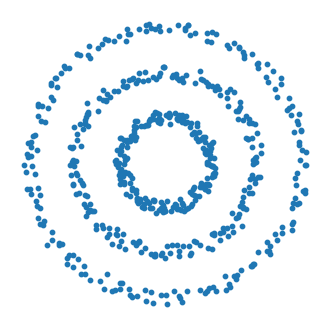

In [2]:
N = 200
sample_interval = np.linspace(0,2 * np.pi, N, endpoint=False)
c1 = np.array([np.sin(sample_interval), np.cos(sample_interval)]).T 
c2 = np.array([2*np.sin(sample_interval), 2*np.cos(sample_interval)]).T 
c3 = np.array([3*np.sin(sample_interval), 3*np.cos(sample_interval)]).T 
X = np.vstack((c1,c2,c3))

np.random.seed(0)
eps = 0.3
X += (np.random.random(X.shape) - 0.5) * eps

size_X = X.shape[0]

PlotUtils.plot_2d_scatter_with_different_colorings(X, point_size=10)

In [3]:
perc = 0.3
# run toroidal coordinates algorithm with 3 most persistent classes
tc = ToroidalCoords(X, n_landmarks=300)
cohomology_classes = [0,1,2]
toroidal_coords = tc.get_coordinates(perc = perc, cohomology_classes = cohomology_classes)

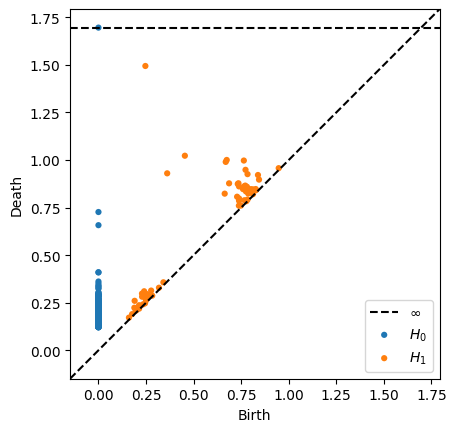

In [5]:
from persim import plot_diagrams
plot_diagrams(tc.dgms_)

In [4]:
# run circular coordinates algorithm with 3 most persistent classes
cc = CircularCoords(X, n_landmarks=300)
circular_coords1 = cc.get_coordinates(perc = perc, cocycle_idx = [cohomology_classes[0]])
circular_coords2 = cc.get_coordinates(perc = perc, cocycle_idx = [cohomology_classes[1]])
circular_coords3 = cc.get_coordinates(perc = perc, cocycle_idx = [cohomology_classes[2]])
circular_coords = [circular_coords1, circular_coords2, circular_coords3]

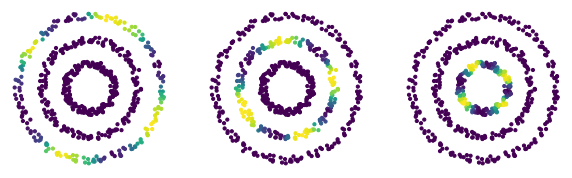

In [5]:
# the three circle-valued maps returned by toroidal coordinates

t_col1 = CircleMapUtils.levelset_coloring(toroidal_coords[0])
t_col2 = CircleMapUtils.levelset_coloring(toroidal_coords[1])
t_col3 = CircleMapUtils.levelset_coloring(toroidal_coords[2])

PlotUtils.plot_2d_scatter_with_different_colorings(X[:,[1,0]], [t_col1,t_col2,t_col3], point_size=10)

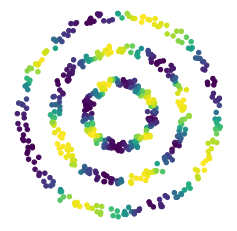

In [6]:
# the sum of the three maps returned by toroidal coordinates

t_sum = CircleMapUtils.linear_combination(
    np.array([toroidal_coords[0],toroidal_coords[1],toroidal_coords[2]]),
    np.array([1,1,1])
    )

t_col_sum = CircleMapUtils.levelset_coloring(t_sum)
PlotUtils.plot_2d_scatter_with_different_colorings(X[:,[1,0]], [t_col_sum], point_size=20)

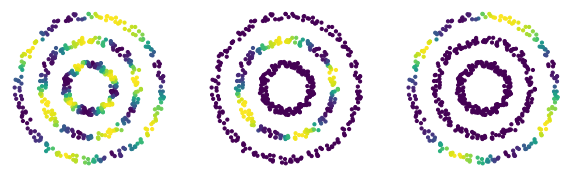

In [7]:
# the three circle-valued maps returned by circular coordinates
c_col1 = CircleMapUtils.levelset_coloring(circular_coords[0])
c_col2 = CircleMapUtils.levelset_coloring(circular_coords[1])
c_col3 = CircleMapUtils.levelset_coloring(circular_coords[2])

PlotUtils.plot_2d_scatter_with_different_colorings(X[:,[1,0]], [c_col1,c_col2,c_col3], point_size=10)

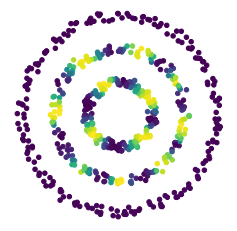

In [8]:
# the sum of the three circle-valued maps returned by circular coordinates

c_col_sum = CircleMapUtils.levelset_coloring((circular_coords[0] + circular_coords[1] + circular_coords[2]) % (2 * np.pi))
PlotUtils.plot_2d_scatter_with_different_colorings(X[:,[1,0]], [c_col_sum], point_size=20)

Note how the sum right above is not parametrizing the outermost circle, its parametrizing *twice* the circle in the middle, and one the innermost circle